In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import seaborn as sns
!pip install neattext
import neattext.functions as nfx
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.1 MB/s 
Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Project-Phase1-CS4/emotions.csv")

In [ ]:
df.head()

,text,emotions
0,i feel awful about it too because it s my job ...,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i reall...,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to oth...,love


In [ ]:
df['text'][4]

'i beleive that i am much more sensitive to other peoples feelings and tend to be more compassionate'

In [ ]:
df.describe()

,text,emotions
count,416809,416809
unique,393822,6
top,i feel more adventurous willing to take risks,joy
freq,16,141067


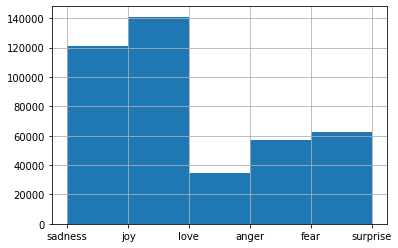

In [ ]:
df['emotions'].hist(bins=5)

In [ ]:
df['emotions'].value_counts()

joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: emotions, dtype: int64

**Add code for each emotion**

In [ ]:
mp = df['emotions'].unique()
mp_sen = {'joy':1,'sadness':2, 'anger':3, 'fear':4, 'love':5,'surprise':6}
def func(s):
    return mp_sen[s]
df['emotion_code'] = df['emotions'].apply(func)
df.head()


,text,emotions,emotion_code
0,i feel awful about it too because it s my job ...,sadness,2
1,im alone i feel awful,sadness,2
2,ive probably mentioned this before but i reall...,joy,1
3,i was feeling a little low few days back,sadness,2
4,i beleive that i am much more sensitive to oth...,love,5


In [ ]:
from textblob import TextBlob

Add Polarity to emotions




In [ ]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment>0:
        result="Positive"
    elif sentiment<0:
        result = "Negative"
    else:
        result="Neutral"
    return result

In [ ]:
df['sentiment_polarity'] = df['text'].apply(get_sentiment)

In [ ]:
df.head()

,text,emotions,emotion_code,sentiment_polarity
0,i feel awful about it too because it s my job ...,sadness,2,Negative
1,im alone i feel awful,sadness,2,Negative
2,ive probably mentioned this before but i reall...,joy,1,Positive
3,i was feeling a little low few days back,sadness,2,Negative
4,i beleive that i am much more sensitive to oth...,love,5,Positive


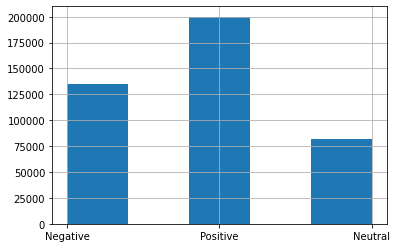

In [ ]:
df['sentiment_polarity'].hist(bins=5)

In [ ]:
df['sentiment_polarity'].value_counts()

Positive    199953
Negative    135170
Neutral      81686
Name: sentiment_polarity, dtype: int64

**Add code to Polarity of each Emotions**

In [ ]:
mp = df['sentiment_polarity'].unique()
mp_sen = {'Positive':1,'Neutral':0, 'Negative':-1}
def func(s):
    return mp_sen[s]
df['sentiment_polarity_code'] = df['sentiment_polarity'].apply(func)
df.head()


,text,emotions,emotion_code,sentiment_polarity,sentiment_polarity_code
0,i feel awful about it too because it s my job ...,sadness,2,Negative,-1
1,im alone i feel awful,sadness,2,Negative,-1
2,ive probably mentioned this before but i reall...,joy,1,Positive,1
3,i was feeling a little low few days back,sadness,2,Negative,-1
4,i beleive that i am much more sensitive to oth...,love,5,Positive,1


In [ ]:
#group each emotion according to its polarity 
df.groupby(['emotions','sentiment_polarity']).size()

emotions  sentiment_polarity
anger     Negative               27973
          Neutral                13594
          Positive               15750
fear      Negative               21572
          Neutral                11883
          Positive               14257
joy       Negative               14334
          Neutral                20096
          Positive              106637
love      Negative                6641
          Neutral                 5049
          Positive               22864
sadness   Negative               58676
          Neutral                29722
          Positive               32789
surprise  Negative                5974
          Neutral                 1342
          Positive                7656
dtype: int64

In [ ]:
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f81bb8bfb00>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x576 with 0 Axes>

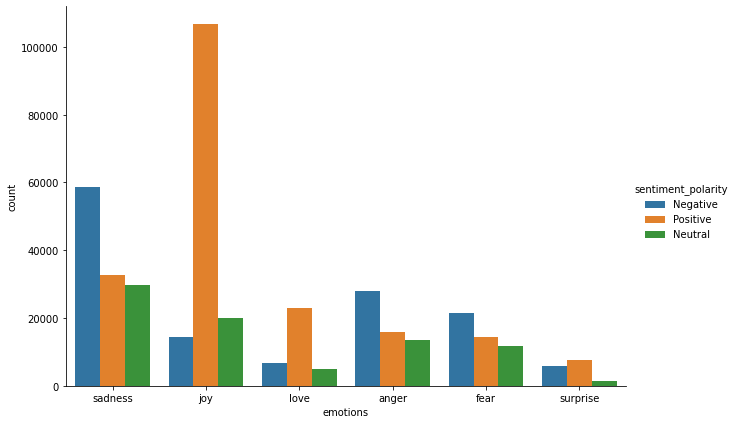

In [ ]:
plt.figure(figsize=(18,8))
sns.factorplot(x='emotions',hue='sentiment_polarity',data=df,kind='count',size=6,aspect=1.5)

**text cleaning**
taking keywords

In [ ]:
df_clean = df

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df_clean['clean_text'] = df_clean['text'].apply(nfx.remove_stopwords)

In [ ]:
df_clean['text']

0         i feel awful about it too because it s my job ...
1                                     im alone i feel awful
2         ive probably mentioned this before but i reall...
3                  i was feeling a little low few days back
4         i beleive that i am much more sensitive to oth...
                                ...                        
416804    that was what i felt when i was finally accept...
416805    i take every day as it comes i m just focussin...
416806        i just suddenly feel that everything was fake
416807    im feeling more eager than ever to claw back w...
416808    i give you plenty of attention even when i fee...
Name: text, Length: 416809, dtype: object

In [ ]:
df_clean['clean_text'] = df_clean['clean_text'].apply(nfx.remove_punctuations)

In [ ]:
df_clean['clean_text'] = df_clean['clean_text'].apply(nfx.remove_userhandles)

In [ ]:
df_clean[['text','clean_text']]

,text,clean_text
0,i feel awful about it too because it s my job ...,feel awful job position succeed happen
1,im alone i feel awful,im feel awful
2,ive probably mentioned this before but i reall...,ive probably mentioned feel proud actually kee...
3,i was feeling a little low few days back,feeling little low days
4,i beleive that i am much more sensitive to oth...,beleive sensitive peoples feelings tend compas...
...,...,...
416804,that was what i felt when i was finally accept...,felt finally accepted bulgarian conservatorie ...
416805,i take every day as it comes i m just focussin...,day comes focussing eating better moment aimin...
416806,i just suddenly feel that everything was fake,suddenly feel fake
416807,im feeling more eager than ever to claw back w...,im feeling eager claw went pear shaped week track


In [ ]:
from collections import Counter

In [ ]:
def extract_keywords(text,num=50):
    tokens = [ tok for tok in text.split()]
    most_common_tokens= Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [ ]:
emotion_list = df_clean['emotions'].unique().tolist()

In [ ]:
df_clean[df_clean['emotions']== 'love']['clean_text']

4         beleive sensitive peoples feelings tend compas...
5         find frustrated christians feel constantly tal...
19         feel blessed everyday little man love watch grow
24        alternate feeling sympathetic humanity misanth...
35                                    feel passionate today
                                ...                        
416774               feel horny want sxual encounter mumbai
416780    want gives major orgasm feel horny ill screw m...
416796         want stop feeling caught grossed sympathetic
416798    im feeling generous today heres seen good chuckle
416800    im truly sorry abandoned feeling faithful blog...
Name: clean_text, Length: 34554, dtype: object

In [ ]:
love_list = df_clean[df_clean['emotions']=='love']['clean_text'].tolist()

In [ ]:
love_docx = ' '.join(love_list)
love_docx

'beleive sensitive peoples feelings tend compassionate find frustrated christians feel constantly talk loving praying seen case feel blessed everyday little man love watch grow alternate feeling sympathetic humanity misanthrope feel passionate today feel blessed grateful today feeling compassionate need help want fix problems dont figure parts need long job emergency feel mouth water devoted energy evoking yelps lips feel gentle href http www feel romantic hand hand couple kids free feel like puppets obstacle distracting story drama supporting adding love feel passionate started feel horny responded kisses im feeling loving homeschooling gig space comes feel generous think art dont necessarily good art high art imagine sitting fire party care trying tell feel waiting longing moment feeling mixed feelings feel tender tentative unfurling innocent desire mate find scent pretty generic actually feel like bath amp bodyworks didnt invest time collection like created sweet paris decided throw

In [ ]:
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token',y='count',data=df_01)
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
keyword_love = extract_keywords(love_docx)

In [ ]:
keyword_love

{'feel': 24463,
 'feeling': 10303,
 'like': 7558,
 'im': 4775,
 'love': 2365,
 'know': 2077,
 'people': 1705,
 'time': 1690,
 'loved': 1667,
 'loving': 1634,
 'want': 1609,
 'hot': 1574,
 'sweet': 1565,
 'little': 1536,
 'liked': 1512,
 'caring': 1492,
 'sympathetic': 1424,
 'longing': 1424,
 'gentle': 1409,
 'think': 1407,
 'tender': 1393,
 'lovely': 1392,
 'accepted': 1389,
 'blessed': 1362,
 'supporting': 1316,
 'passionate': 1314,
 'romantic': 1301,
 'life': 1213,
 'way': 1210,
 'feelings': 1189,
 'nostalgic': 1178,
 'naughty': 1174,
 'horny': 1148,
 'generous': 1139,
 'ive': 1137,
 'supportive': 1061,
 'beloved': 1052,
 'delicate': 1050,
 'need': 1048,
 'loyal': 997,
 'dont': 944,
 'feels': 937,
 'things': 901,
 'bit': 897,
 'day': 882,
 'going': 882,
 'fond': 791,
 'faithful': 743,
 'good': 679,
 'today': 674}

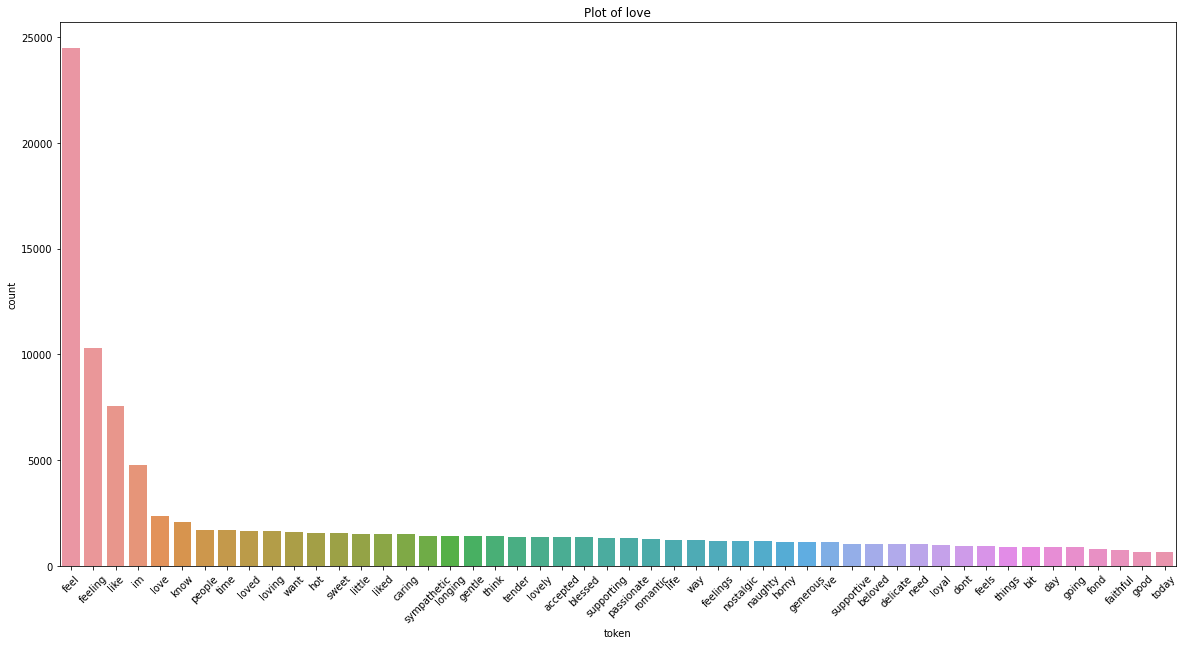

In [ ]:
plot_most_common_words(keyword_love,"love")

In [ ]:
## word cloud
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

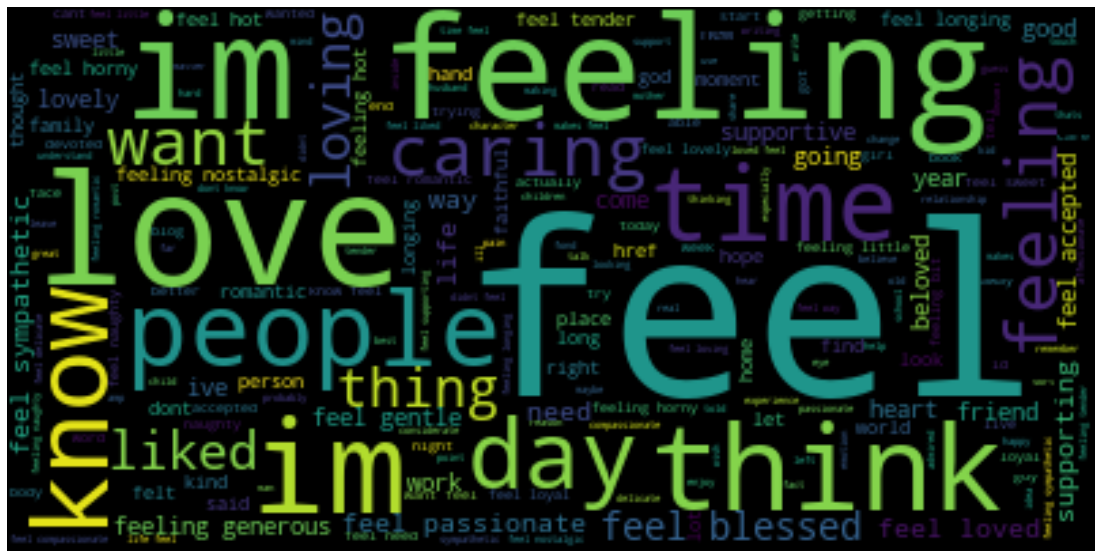

In [ ]:
plot_wordcloud(love_docx)

**ML Logistic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
Xfeatures = df['text']
ylabels = df['emotions']

In [ ]:
cv= CountVectorizer()

In [ ]:
#vectorizer
X=cv.fit_transform(Xfeatures)

In [ ]:
#get feature by name
cv.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaa',
 'aaaa',
 'aaaaaaaaaaaaaaaaggghhhh',
 'aaaaaaaaaaaaaaarrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrggggggggggggggggggggggggggggghhhhhhhhhhhhhh',
 'aaaaaaaall',
 'aaaaaaand',
 'aaaaaand',
 'aaaaah',
 'aaaaahhhhhh',
 'aaaaall',
 'aaaaand',
 'aaaah',
 'aaaahhhhhh',
 'aaaand',
 'aaah',
 'aaahs',
 'aaand',
 'aaargh',
 'aaawesome',
 'aab',
 'aabsolutely',
 'aac',
 'aacc',
 'aactually',
 'aad',
 'aadmi',
 'aah',
 'aahed',
 'aahhh',
 'aahhing',
 'aainaa',
 'aaishwaryaa',
 'aajao',
 'aakash',
 'aakhri',
 'aal',
 'aaliyah',
 'aallll',
 'aam',
 'aand',
 'aap',
 'aaradhya',
 'aardvark',
 'aardvarkartglass',
 'aaron',
 'aarons',
 'aarrggh',
 'aart',
 'aarthi',
 'aaryn',
 'aashiqui',
 'aate',
 'aatp',
 'aau',
 'ab',
 'aba',
 'aback',
 'abad',
 'abaddon',
 'abagail',
 'abah',
 'abandoment',
 'abandon',
 'abandonded',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandonned',
 'abandons',
 'abandonship',
 'abang',
 'abani',
 'abashed',
 'abashedly',
 'abate',
 'abated',
 'abating',
 'abaya',
 'aba

In [ ]:
# X.toarray()

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.1,random_state=42)

In [ ]:
nv_model = MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nv_model.score(X_test,y_test)

0.8682613181065714

In [ ]:
y_pred_for_nv = nv_model.predict(X_test)

In [ ]:
y_pred_for_nv

array(['sadness', 'sadness', 'fear', ..., 'sadness', 'sadness', 'love'],
      dtype='<U8')

In [ ]:
# The maximum number of words to be used. (most frequent)
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_clean['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 74971 unique tokens.


make a single prediction
vectorized text applied our model

In [ ]:
# The maximum number of words to be used. (most frequent)
from keras.preprocessing.text import Tokenizer
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df_clean['clean_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 74971 unique tokens.


In [ ]:
from keras.preprocessing.text import Tokenizer
MAX_SEQUENCE_LENGTH = 250
# tokenizer = Tokenizer()
X = tokenizer.texts_to_sequences(df_clean['clean_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (416809, 250)


In [ ]:
Y = pd.get_dummies(df_clean['emotions']).values
print('Shape of label tensor:', Y.shape)
Y

Shape of label tensor: (416809, 6)


array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(375128, 250) (375128, 6)
(41681, 250) (41681, 6)


In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM


In [ ]:
# model = Sequential()
# model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
# model.add(tf.keras.layers.SpatialDropout1D(0.2))
# model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(6, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# epochs = 5
# batch_size = 64

# history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
  60/5276 [..............................] - ETA: 50:50 - loss: 1.6005 - accuracy: 0.3477

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tweets = df['text']
labels = df['emotions']

**///////
SECOND METHOD    
///////**

In [ ]:
tokenizer = Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[0]])

[[2,
  3,
  473,
  28,
  13,
  95,
  37,
  13,
  84,
  11,
  330,
  5,
  55,
  80,
  12,
  7,
  1160,
  5,
  2968,
  4,
  13,
  32,
  261,
  43,
  539,
  135]]

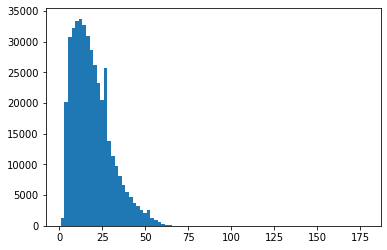

In [ ]:
#length of tweets

lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins = len(set(lengths)))
plt.show()

In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences,truncating='post', padding='post', maxlen=maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[0]

array([   2,    3,  473,   28,   13,   95,   37,   13,   84,   11,  330,
          5,   55,   80,   12,    7, 1160,    5, 2968,    4,   13,   32,
        261,   43,  539,  135,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
classes = set(labels)
print(classes)

{'love', 'joy', 'sadness', 'anger', 'fear', 'surprise'}


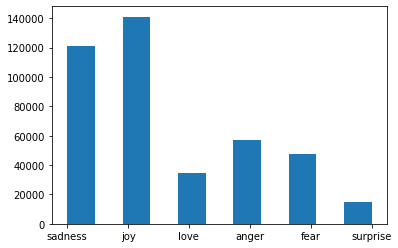

In [ ]:
plt.hist(labels,bins=11)
plt.show()

In [ ]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [ ]:
class_to_index

{'love': 0, 'joy': 1, 'sadness': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

In [ ]:
name_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
train_labels  = name_to_ids(labels)
print(train_labels[3])


2


In [ ]:
X_t, X_test, Y_t, Y_test = train_test_split( padded_train_seq,train_labels, test_size = 0.10, random_state = 42)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_t,Y_t, test_size = 0.10, random_state = 42)

In [ ]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Embedding(10000,16,input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6,activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# val_tweets, val_labels = get_tweet(val)
# val_seq = get_sequences(tokenizer,val_tweets)
# val_labels=name_to_ids(val_labels)

In [ ]:
history= model.fit(
    X_train,Y_train,
    validation_data=(X_val, Y_val),
    epochs=4,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)
    ]      
)

Epoch 1/4
10551/10551 [==============================] - 712s 67ms/step - loss: 0.0957 - accuracy: 0.9391 - val_loss: 0.1003 - val_accuracy: 0.9368
Epoch 2/4
10551/10551 [==============================] - 700s 66ms/step - loss: 0.0913 - accuracy: 0.9416 - val_loss: 0.0970 - val_accuracy: 0.9347
Epoch 3/4
10551/10551 [==============================] - 689s 65ms/step - loss: 0.0883 - accuracy: 0.9421 - val_loss: 0.0971 - val_accuracy: 0.9371
Epoch 4/4
10551/10551 [==============================] - 691s 65ms/step - loss: 0.0867 - accuracy: 0.9425 - val_loss: 0.0971 - val_accuracy: 0.9375


In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.9.2


In [ ]:
eval = model.evaluate(X_test,Y_test)

1303/1303 [==============================] - 21s 16ms/step - loss: 0.0953 - accuracy: 0.9398


In [ ]:
import random
i = random.randint(0, len(Y_test)-1)
i=1012
print(i)
print('Sentences: ', X_test[i])
print('Emotions: ', index_to_class[Y_test[i]])

p = model.predict(np.expand_dims(X_test[i],axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print ('Pridicted emotion: ',pred_class)

1012
Sentences:  [  2  32 137  67  23  68   5   3 484  10  36   6 844   6 117 535 146   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Emotions:  anger
1/1 [==============================] - 3s 3s/step
Pridicted emotion:  anger


In [ ]:
model.save("/content/drive/MyDrive/Project-Phase1-CS4/tweet_emotion_model_1.h5")

In [ ]:
preds= np.argmax(model.predict(X_test),axis=1)

1303/1303 [==============================] - 18s 14ms/step


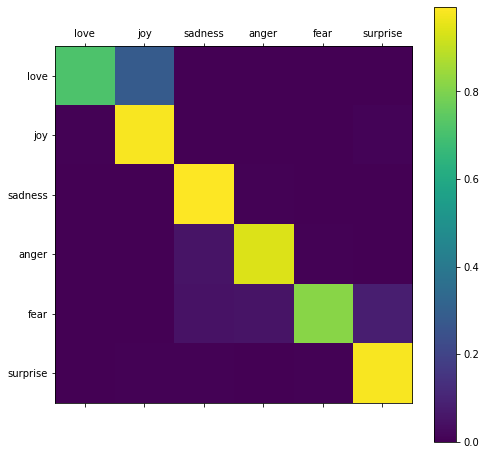

In [ ]:
show_confusion_matrix(Y_test,preds,list(classes))

In [ ]:
print(confusion_matrix(Y_test,preds))

[[ 2440   967     2     0     0     0]
 [   64 13832    21    25     4   113]
 [    1    17 12177    50    10    10]
 [    1    19   289  5352    27     0]
 [    0     9   226   245  3852   388]
 [    0     6     9     0     8  1517]]


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,preds)

0.1297713586526235

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( padded_train_seq,train_labels, test_size = 0.30, random_state = 42)

In [ ]:
model2 = model

In [ ]:
model2.summary()

In [ ]:
history= model2.fit(
    X_train,Y_train,
    # validation_data=(val_seq, val_labels),
    epochs=2,
    callbacks=[
               tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)
    ]      
)

In [ ]:
eval = model.eval(X_test,Y_test)uate

In [ ]:
preds= np.argmax(model.predict(X_test),axis=1)

In [ ]:
show_confusion_matrix(Y_test,preds,list(classes))

In [ ]:
m1 = tf.keras.models.load_model("/content/drive/MyDrive/Project-Phase1-CS4/tweet_emotion_model_1.h5")

In [ ]:
preds= np.argmax(m1.predict(X_test),axis=1)
preds

array([0, 4, 0, ..., 4, 4, 1])

In [ ]:
print(confusion_matrix(Y_test,preds))

[[ 4002     0   383   282    45     8]
 [    1  2965     4     1     5   433]
 [    9     0  1466     1    13    51]
 [    7     0     1  5367   289    24]
 [  174     1     0    59 12007    24]
 [    4   614    71    30    23 13317]]


In [ ]:
Y_test

array([0, 4, 0, ..., 4, 4, 1])

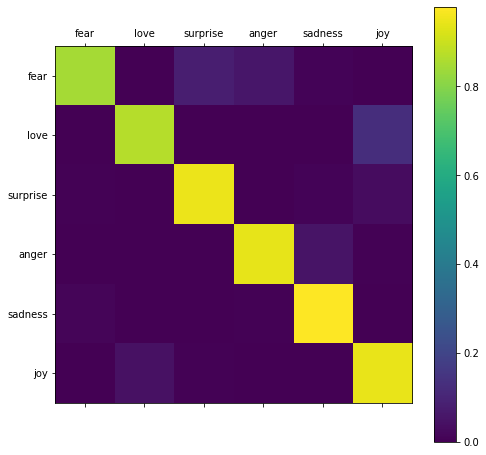

In [ ]:
show_confusion_matrix(Y_test,preds,list(classes))

**BERT MODEL**